## Exercise 9: Classification with Scikit-Learn

In [1]:
import numpy as np
import pandas as pd

###  Task 1: No Free Lunch

In this task we consider the Breast Cancer Wisconsin dataset which is included in the ```sklearn.datasets``` module. In this dataset we aim to predict/classify whether a tumor is malignant or benign, using features of a mammal screen image. More information on the dataset can be found below, feel free to further explore the dataset yourself.

In [2]:
from sklearn import datasets
dta = datasets.load_breast_cancer()
print(dta.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
X = dta.data
y = dta.target

We now want to apply three different classifiers in sklearn, namely a logistic regression classifier ```LogisticRegression```, a support vector classifier ```SVC```, and a Nearest Neighbors classifier ```KNeighborsClassifier```, to perform classification on this dataset. The corresponding algorithms are imported in the cell below.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### a) Applying Default Settings

Split the data into a training and a test set, using a relative test set size of 30%. Afterwards, apply each of the three algorithms with their default parameters on the test data and check their accuracy and AUC score. Which algorithm appears to work best?

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [7]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred1 = svm.predict(X_test)
y_score1 = svm.decision_function(X_test)
print(accuracy_score(y_test, y_pred1))
print(roc_auc_score(y_test, y_score1))

0.9649122807017544
0.9777943368107302


In [8]:
logit = LogisticRegression(max_iter = 10000)
logit.fit(X_train,y_train)
y_pred2 = logit.predict(X_test)
y_score2 = logit.predict_proba(X_test)[:,1]
print(accuracy_score(y_test, y_pred2))
print(roc_auc_score(y_test, y_score2))

0.9824561403508771
0.9918032786885246


In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
y_score3 = knn.predict_proba(X_test)[:,1]
print(accuracy_score(y_test, y_pred3))
print(roc_auc_score(y_test, y_score3))

0.9473684210526315
0.9749627421758569


__Answer:__ This dataset seems rather easy to classify, but Logistic Regression seems to have the edge over the rest.

#### b) Tweaking Parameters

We now want to check whether we can even improve the performances of our algorithms. For that matter, we want to tweak some parameters of the three given algorithms. More precisely, we want to tweak the following parameters:
* ```LogisticRegression```: the regularization parameter ```C``` and the ```penalty``` function
* ```SVC```: the ```kernel```function and the regularization parameter ```C```
* ```KNeighborsClassifier```: the neighborhood size ```n_neighbors```

Conduct your own parameter search and determine the parameter setting which yields the best cross-validated accuracy score. Is there a clear best algorithm?

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
svm_params = dict({'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C': [0.01,0.1,1,10,100,1000,10000]})

svm = SVC()
clf1 = GridSearchCV(svm, svm_params)
clf1.fit(X,y)

res1 = clf1.cv_results_

In [12]:
print(res1)

{'mean_fit_time': array([1.28157616e-02, 3.20281982e-03, 6.80594444e-03, 7.20634460e-03,
       9.66874599e-02, 2.40182877e-03, 4.00347710e-03, 7.40656853e-03,
       8.10936642e-01, 2.00166702e-03, 3.00240517e-03, 7.00616837e-03,
       2.41839724e+00, 2.40173340e-03, 2.20150948e-03, 6.40554428e-03,
       6.00745931e+00, 3.20267677e-03, 2.60152817e-03, 5.60460091e-03,
       6.06050692e+00, 9.60860252e-03, 3.80344391e-03, 5.20462990e-03,
       6.80478363e+00, 3.28297615e-02, 1.00095272e-02, 5.20467758e-03]), 'std_fit_time': array([1.16801907e-03, 4.00352535e-04, 4.00567094e-04, 4.00590911e-04,
       7.14611898e-02, 4.90465972e-04, 2.33601546e-07, 4.90388050e-04,
       3.08666158e-01, 2.86102295e-07, 3.01578299e-07, 6.33239046e-04,
       4.93320444e-01, 4.90641167e-04, 4.00328732e-04, 4.90213029e-04,
       1.72759707e+00, 4.00424128e-04, 4.90582726e-04, 2.33415391e-03,
       4.76947603e+00, 2.94209467e-03, 7.48888953e-04, 1.60155297e-03,
       4.04330693e+00, 6.24677996e-03, 2.

In [13]:
print(clf1.best_estimator_)
print(clf1.best_score_)

SVC(C=100, kernel='linear')
0.9631268436578171


In [14]:
logit_params = dict({'penalty': ['l1', 'l2', 'elasticnet'],
                   'C': [0.0001,0.001,0.01,0.1,1,10,100]})

logit = LogisticRegression(solver = 'saga', max_iter = 10000, l1_ratio = 0.5)
clf2 = GridSearchCV(logit, logit_params)
clf2.fit(X,y)

res2 = clf2.cv_results_

C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\li

C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\li

C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


In [15]:
print(clf2.best_estimator_)
print(clf2.best_score_)

LogisticRegression(C=0.01, l1_ratio=0.5, max_iter=10000, solver='saga')
0.9226672876882471


In [16]:
knn_params = dict({'n_neighbors': [1,3,5,10,20,30,50,100]})

knn = KNeighborsClassifier()
clf3 = GridSearchCV(knn, knn_params)
clf3.fit(X,y)

res3 = clf3.cv_results_

In [17]:
print(clf3.best_estimator_)
print(clf3.best_score_)

KNeighborsClassifier(n_neighbors=20)
0.9314857941313461


__Answer:__ On the given data, a linear SVM with C = 100 seems to yield the best cross-validated accuracy score.

### Task 2: Multi-Class Classification

In lecture we have focused on the binary case in classification. However, in many applications there are more than two classes to predict.  
One standard strategy to extend binary classification methods to the multiclass case is the so-called _one-vs-all_ approach, which requires a classifier that can also produce a confidence score for its predictions rather than the crisp predictions themselves. In logistic regression for instance, such a confidence score is given by the class probabilities.  
Assuming that you there are $L$ classes $C_1,\dots, C_L$, in the one-vs-all approach one fits $L$ binary models where in the $l$-th model the goal is to predict whether a sample belongs to class $C_l$ or not. After fitting the $l$-th model, the confidence score of each sample belonging to class $C_l$ is then computed and stored, and in the end, the class that achieved the highest confidence score among all $L$ classes is then chosen as the final prediction.

In this task, we are going to implement this approach and apply it on a student evaluation dataset, aiming to predict which of three course instructors has given a class. The dataset is loaded in the cell below, and documented on http://archive.ics.uci.edu/ml/datasets/turkiye+student+evaluation. Feel free to explore the data beforehand. Note that we drop the class (lecture) identifier, since this uniquely determines the instructors.

In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00262/turkiye-student-evaluation_generic.csv"

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00262/turkiye-student-evaluation_generic.csv",
                  index_col = False,
                  sep = ',',
                  skipinitialspace = True)

# drop class for training purposes - this would uniquely identify instructors
df = df.drop(columns = ['class','nb.repeat'])
df.head()

,instr,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,0,4,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,4,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### a) Implementing Multiclass-Classification with Logistic Regression

Implement a function mc_predict() that uses the one-vs-all approach to perform multiclass classififcation based on logistic regression. Thus, you have to fit multiple binary models. Use the function signature given in the cell below, i.e. include as input both training data as well as a test set to predict on after fitting the model. You may use sklearn to fit the binary models.  
Apply your function on the student evaluation data, and compute the accuracy on both training and test set!

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def mc_predict(X_train,y_train,X_test):
    """
    :param X_train: two dimensional numpy array describing the feature matrix to train on
    :param y_train: one dimensional numpy array or list representing the class vector used in training
    :param X_test: two dimensional numpy array describing the feature matrix to train on.
    :
    :return: one dimensional numpy array epresenting the predictions on test data
    """
    
    Y = np.unique(y_train)
    M = len(Y)
    
    # collect class-wise confidence scores in this matrix
    y_probs = np.zeros((X_test.shape[0],M))
    # iterate over all classes
    for i in range(M):
        # fit binary model
        y_curr = np.array(y_train==Y[i]).astype(int) 
        clf = LogisticRegression()
        clf.fit(X_train, y_curr)
        y_probs[:,i] = clf.predict_proba(X_test)[:,1]

    # return classes that yielded highest confidence
    return np.array([Y[i] for i in np.argmax(y_probs, axis=1)])

In [20]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)


y_pred = mc_predict(X_train,y_train,X_train)
print(accuracy_score(y_train,y_pred))

y_pred = mc_predict(X_train,y_train,X_test)
print(accuracy_score(y_test,y_pred))

0.621441395229546
0.6184279021343051


#### b) Comparison to Scikit-learn

Note that the logistic regreesion in sklearn also enables the multiclass case as it has a built-in one-vs-all functionality. Compare your predictions and accuracy scores to those resulting from the built-in functions.

In [21]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test)) # same results as in our implementation!

0.62426263144396
0.6173867777199376


C:\Users\Tobias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Task 3: The Ensemble Effect: Decision Trees and Random Forests

Other than logistic regressors, decision trees (and thus also random forests) naturally allow for multiclass classification without having to employ a one-vs-all strategy.

#### a) Classification with Decision Trees

Apply the decision tree classifier from sklearn on the student evaluation data and compare the accuracies on training and test data with those resulting from the logistic regression. What do you observe?

In [22]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7966145165427032
0.5455491931285789


**Answer:** The decision tree model appears to work very well on the training data, but not to generalize that well. In particular, a single tree by itself gets outperformed by the logistic regression models that we used above.

#### b) Growing a Forest

For all $n\in\{3,\dots,100\}$, apply sklearns functionalities to fit a random forest with $n$ trees on the student evaluation data. For each model, compute the accuracy on the test set, and plot the number of trees against the resulting accuracies.

In [23]:
from sklearn.ensemble import RandomForestClassifier

s=[]
for n in np.arange(3,101):

    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    s.append(clf.score(X_test,y_test))

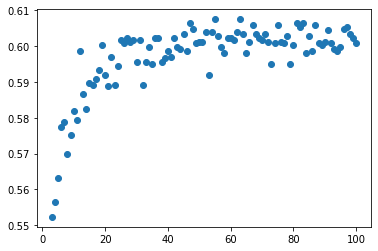

In [24]:
from matplotlib import pyplot as plt
plt.scatter(np.arange(3,101),s)
plt.show()

The plot exemplifies how a growing forest initially tends to strongly improve the performance of the model, until it saturates at some constant maximum level, where the differences in the scores are only due to the noise that the randomness induces.